# Final Project - Cyber Security for Book Website
Danny Mathieson

## Contents

#### [Week 1: Exploratory Data Analysis](#exploratory-data-analysis)
1. [Each sample has 32 features ranging from -1,0,1. Explore the data using histogram, heatmaps.](#1-each-sample-has-32-features-ranging-from--101-explore-the-data-using-histogram-heatmaps)
2. [Determine the number of samples present in the data, unique elements in all the features.](#2-determine-the-number-of-samples-present-in-the-data-unique-elements-in-all-the-features)
3. [Check if there is any null value in any features.](#3-check-if-there-is-any-null-value-in-any-features)



#### [Week 2: Correlation of Features and Feature Selection](#correlation-of-features-and-feature-selection)



#### [Week 3 & 4: Building Classification Model](#building-classification-model)
1. [Build classification models using a binary classifier to detect malicious or phishing URLs.](#1-build-classification-models-using-a-binary-classifier-to-detect-malicious-or-phishing-urls)
2. [Illustrate the diagnostic ability of this binary classifier by plotting the ROC curve.](#2-illustrate-the-diagnostic-ability-of-this-binary-classifier-by-plotting-the-roc-curve)
3. Validate the accuracy of data by the K-Fold cross-validation technique.
4. The final output consists of the model, which will give maximum accuracy on the validation dataset with selected attributes.




## Exploratory Data Analysis

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# set styling for plots
sns.set_style('whitegrid')

In [2]:
# Import data into pandas dataframe
df = pd.read_csv('./datasets/dataset.csv', index_col='index')

print(df.shape)

(11055, 31)


In [3]:
print(df.describe())

       having_IPhaving_IP_Address  URLURL_Length  Shortining_Service  \
count                11055.000000   11055.000000        11055.000000   
mean                     0.313795      -0.633198            0.738761   
std                      0.949534       0.766095            0.673998   
min                     -1.000000      -1.000000           -1.000000   
25%                     -1.000000      -1.000000            1.000000   
50%                      1.000000      -1.000000            1.000000   
75%                      1.000000      -1.000000            1.000000   
max                      1.000000       1.000000            1.000000   

       having_At_Symbol  double_slash_redirecting  Prefix_Suffix  \
count      11055.000000              11055.000000   11055.000000   
mean           0.700588                  0.741474      -0.734962   
std            0.713598                  0.671011       0.678139   
min           -1.000000                 -1.000000      -1.000000   
25%        

In [4]:
print(df.head())

       having_IPhaving_IP_Address  URLURL_Length  Shortining_Service  \
index                                                                  
1                              -1              1                   1   
2                               1              1                   1   
3                               1              0                   1   
4                               1              0                   1   
5                               1              0                  -1   

       having_At_Symbol  double_slash_redirecting  Prefix_Suffix  \
index                                                              
1                     1                        -1             -1   
2                     1                         1             -1   
3                     1                         1             -1   
4                     1                         1             -1   
5                     1                         1             -1   

       having_Sub_

### 1. Each sample has 32 features ranging from -1,0,1. Explore the data using histogram, heatmaps. 

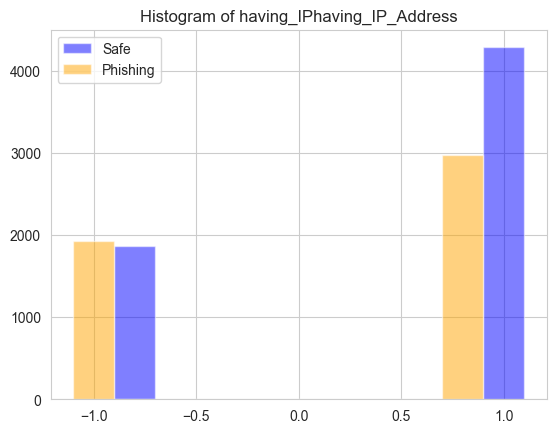

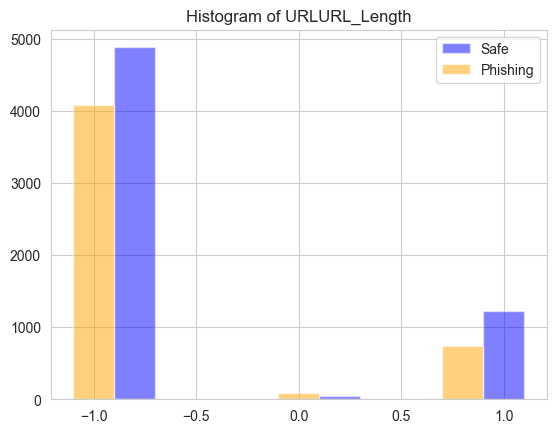

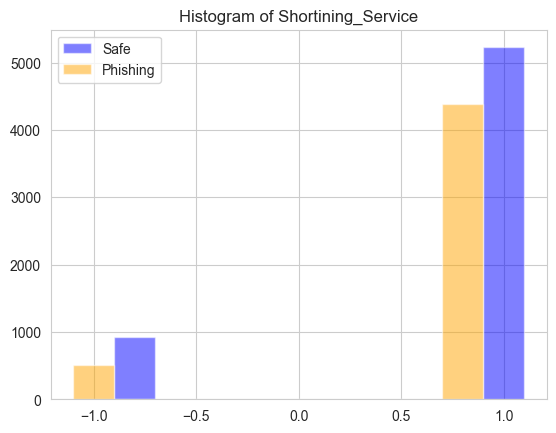

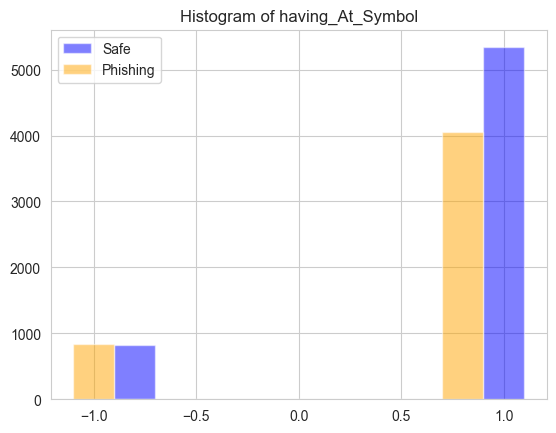

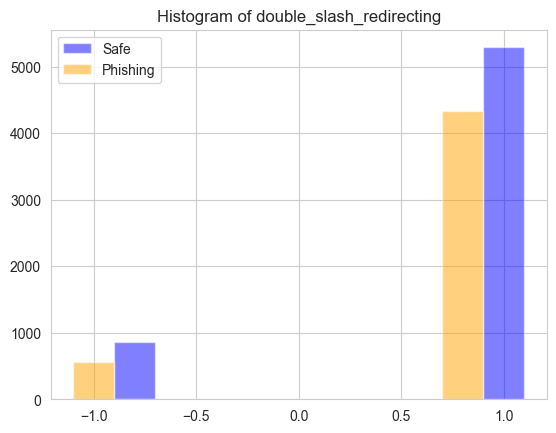

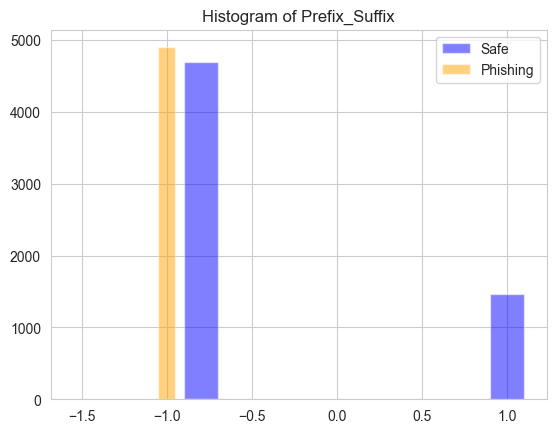

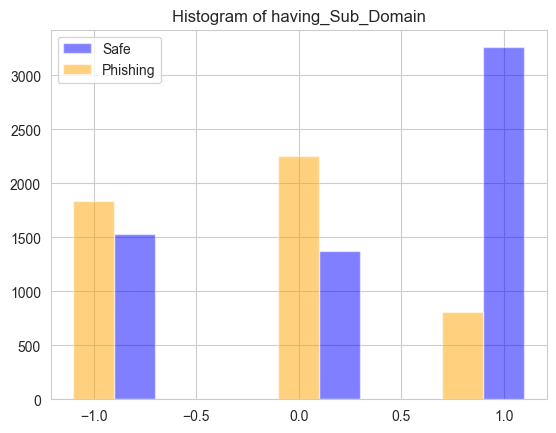

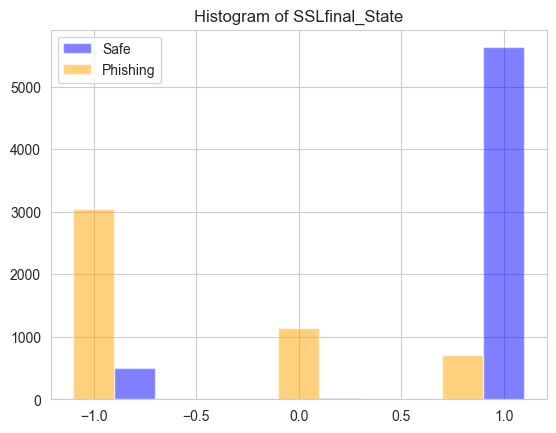

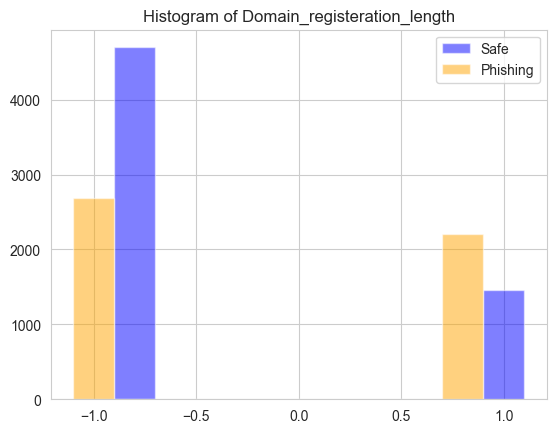

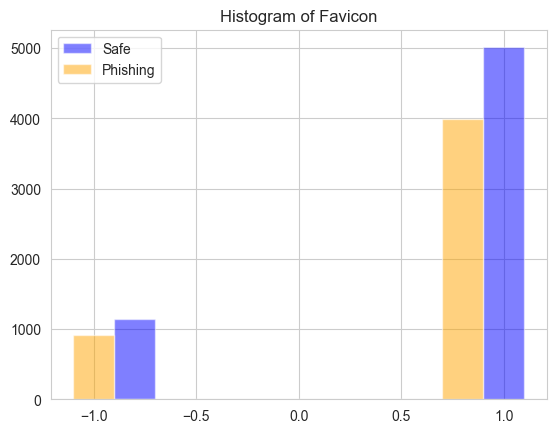

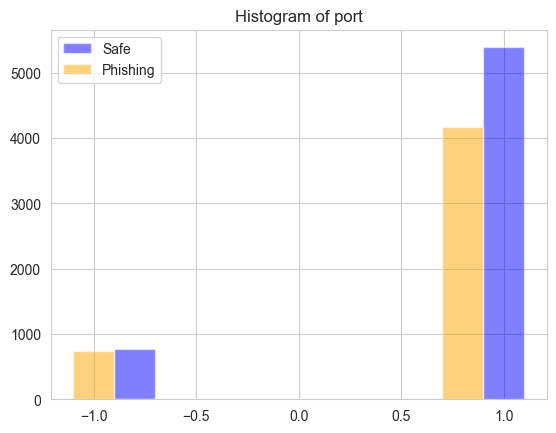

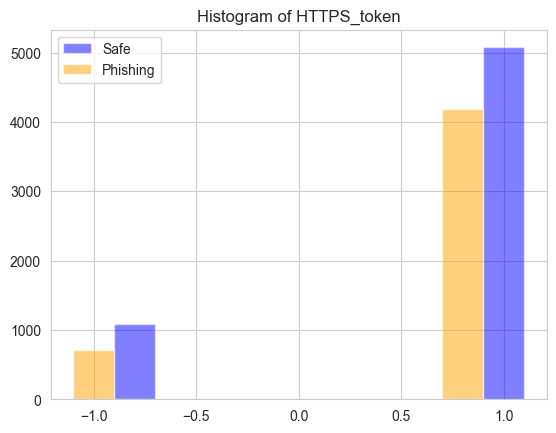

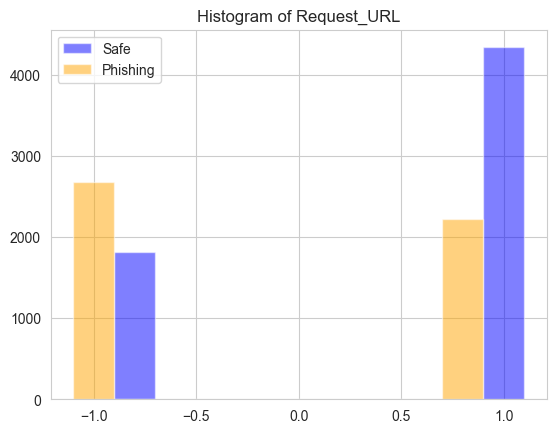

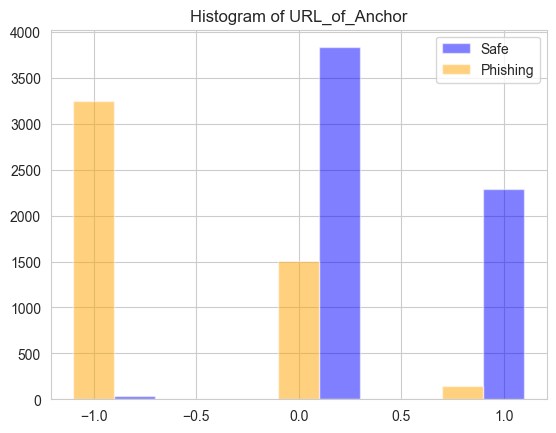

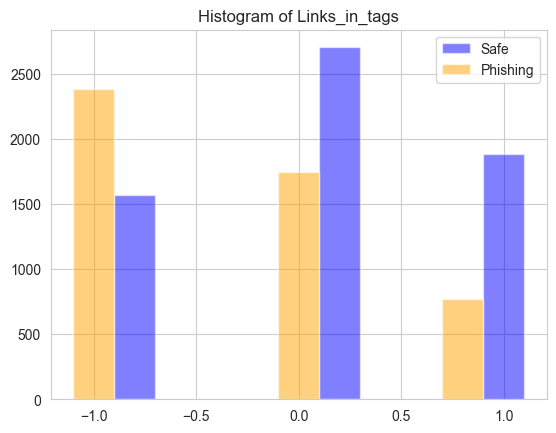

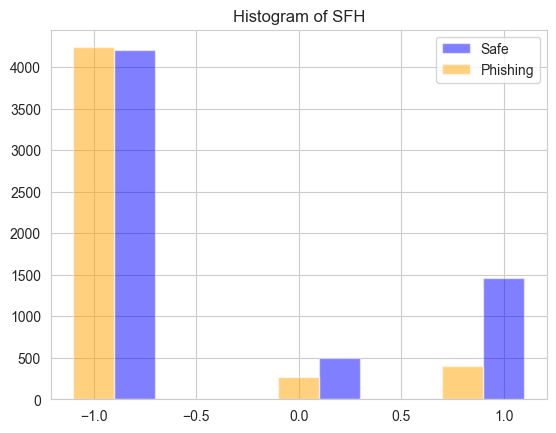

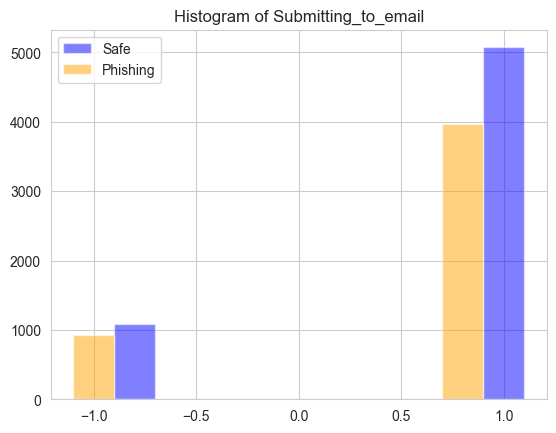

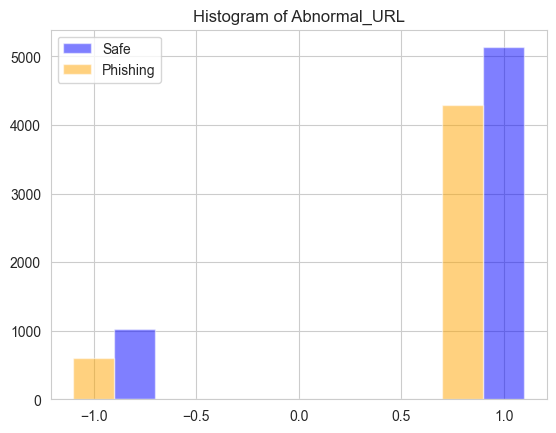

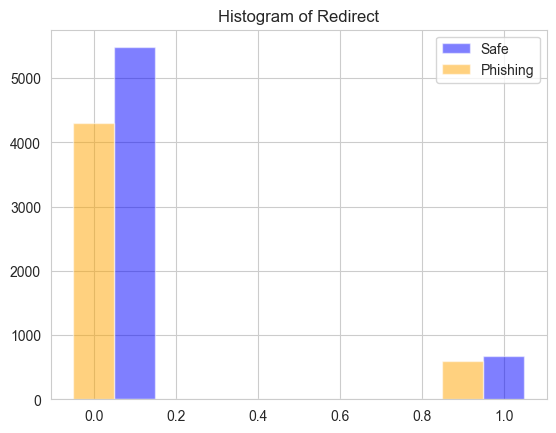

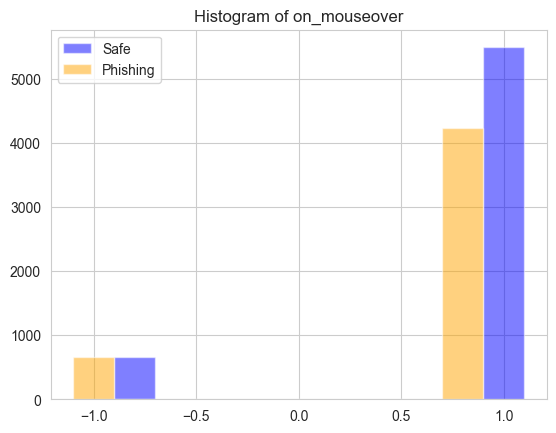

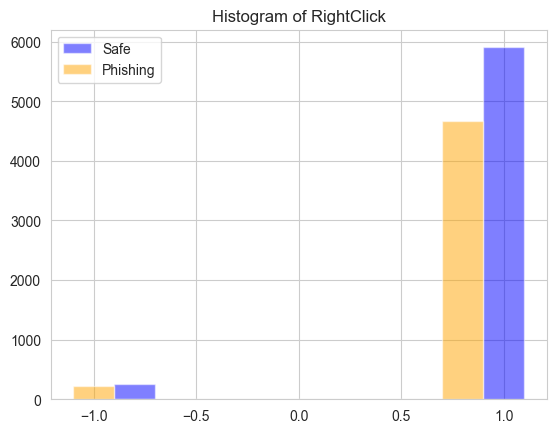

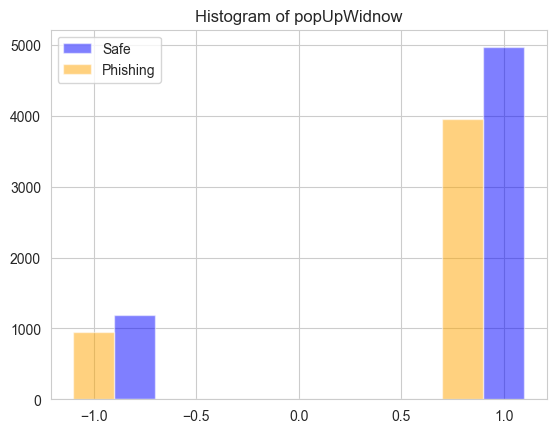

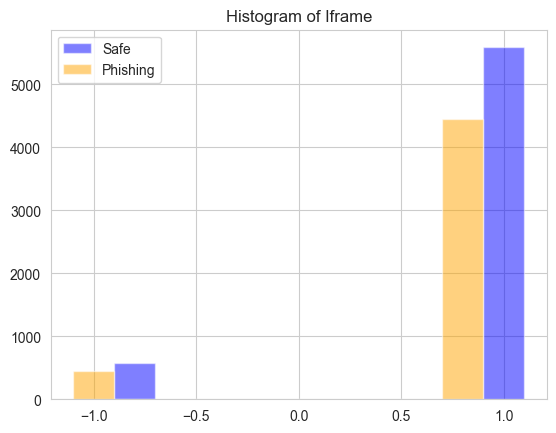

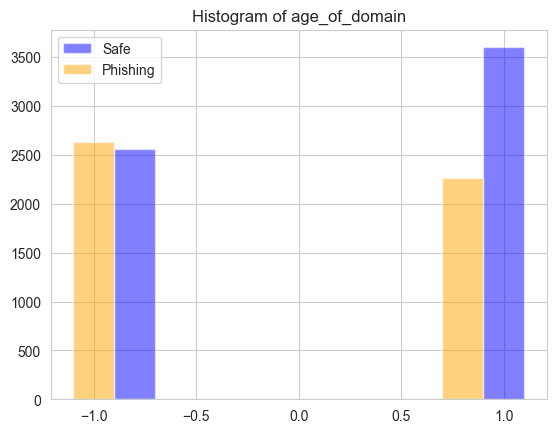

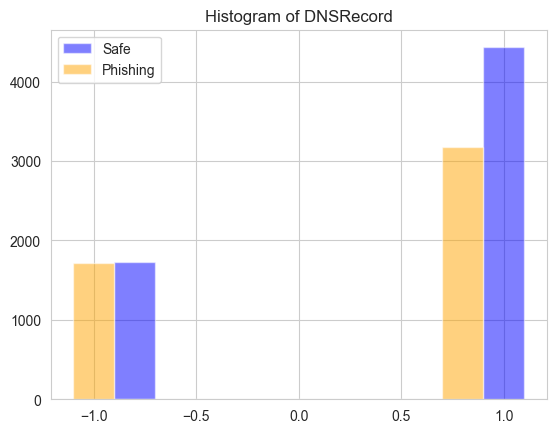

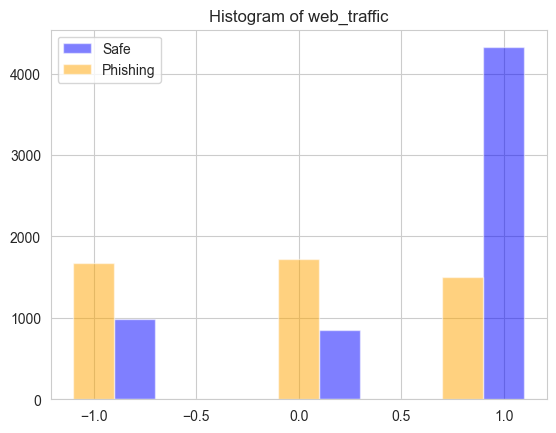

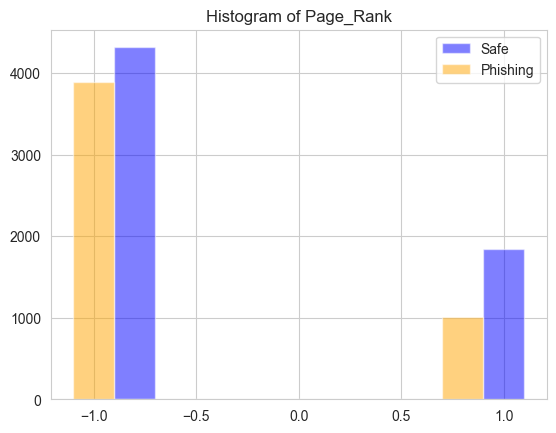

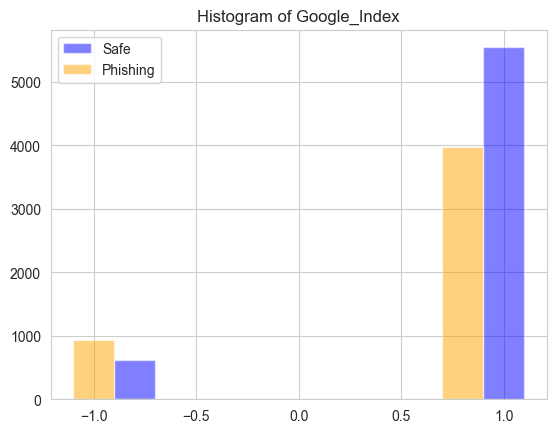

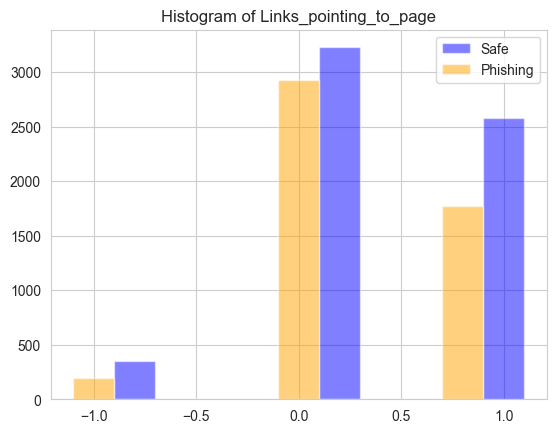

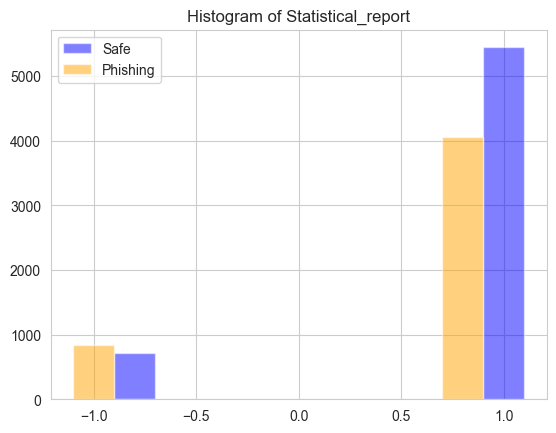

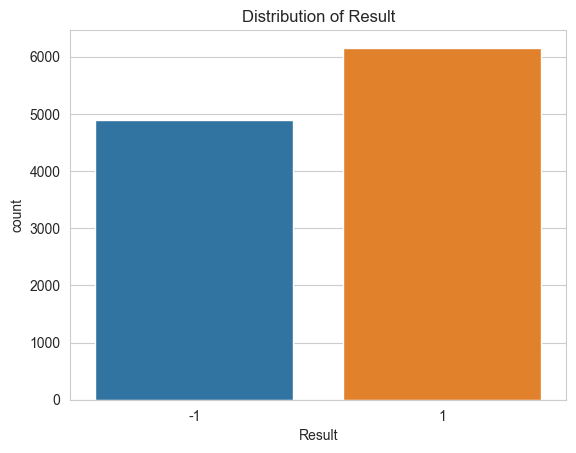

In [5]:
# Build 2 histograms for each non-Result column, one for each class
for col in df.columns:
    if col != 'Result':
        plt.figure()
        # make Safe class blue and to the right of each label, and Phishing class orange and to the left of each label
        plt.hist(df[df['Result'] == 1][col], color='blue', alpha=0.5, label='Safe', align='right')
        plt.hist(df[df['Result'] == -1][col], color='orange', alpha=0.5, label='Phishing', align='left')
        plt.legend()
        plt.title('Histogram of {}'.format(col))
        # save images to disk
        plt.savefig(f'./images/feature_histograms/{col}.png')
        plt.show()
    else:
        # plot the distribution of the Result column
        plt.figure()
        sns.countplot(x='Result', data=df)
        plt.title('Distribution of Result')
        plt.savefig('./images/feature_histograms/Result.png')
        plt.show()

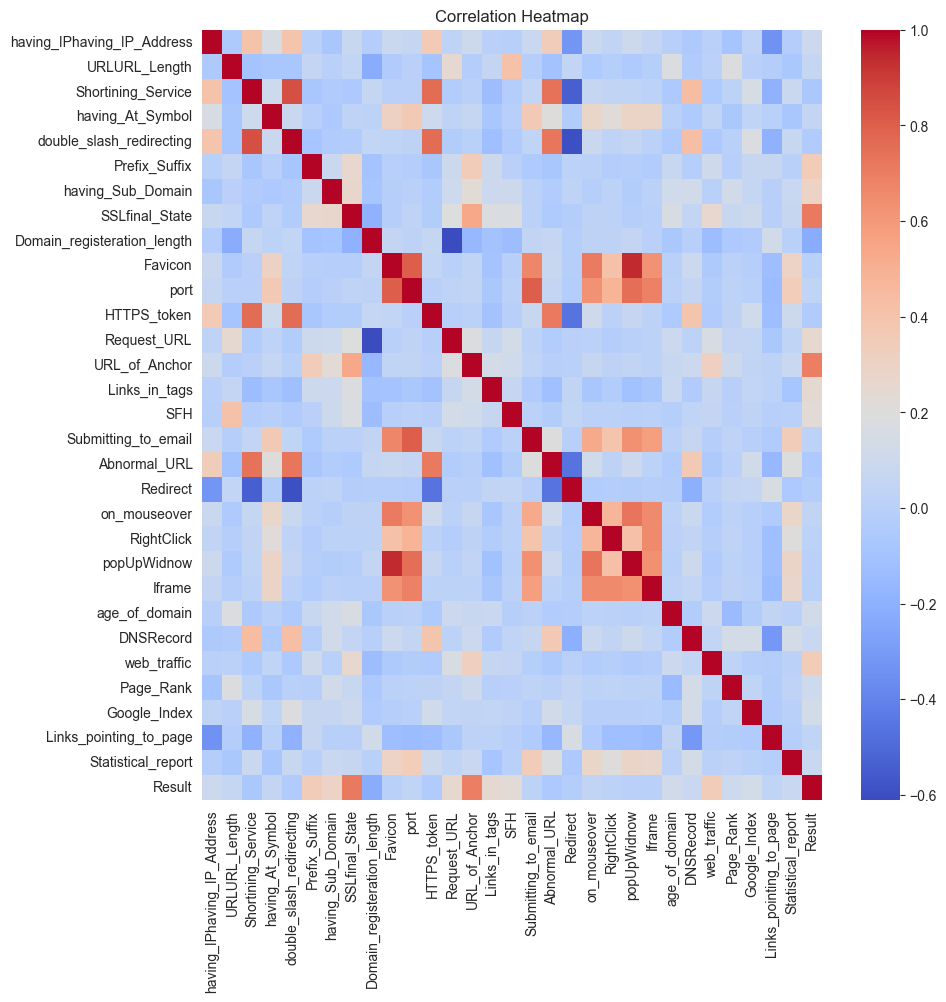

In [6]:
# Create a Heatmap of the correlation between all columns
# size the figure
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.savefig('./images/correlation_heatmap.png')
plt.show()

In [7]:
# Display the pairs of columns with higher than 0.5 correlation and lower than -0.5 correlation
print('Higher than 0.5 correlation:\n')
print(df.corr()[df.corr() > 0.5].unstack().drop_duplicates().sort_values(ascending=False))
print('\n\nLower than -0.5 correlation:\n')
print(df.corr()[df.corr() < -0.5].unstack().drop_duplicates().sort_values(ascending=False))

Higher than 0.5 correlation:

having_IPhaving_IP_Address  having_IPhaving_IP_Address    1.000000
Favicon                     popUpWidnow                   0.939633
Shortining_Service          double_slash_redirecting      0.842796
Favicon                     port                          0.803834
port                        Submitting_to_email           0.799088
double_slash_redirecting    HTTPS_token                   0.760799
Shortining_Service          HTTPS_token                   0.757838
port                        popUpWidnow                   0.748517
Shortining_Service          Abnormal_URL                  0.739290
on_mouseover                popUpWidnow                   0.733629
double_slash_redirecting    Abnormal_URL                  0.723724
HTTPS_token                 Abnormal_URL                  0.716287
SSLfinal_State              Result                        0.714741
Favicon                     on_mouseover                  0.706179
URL_of_Anchor               Resu

In [8]:
# Repeat correlation exercise with just Safe and Phising classes
safe_df = df[df['Result'] == 1]
phishing_df = df[df['Result'] == -1]

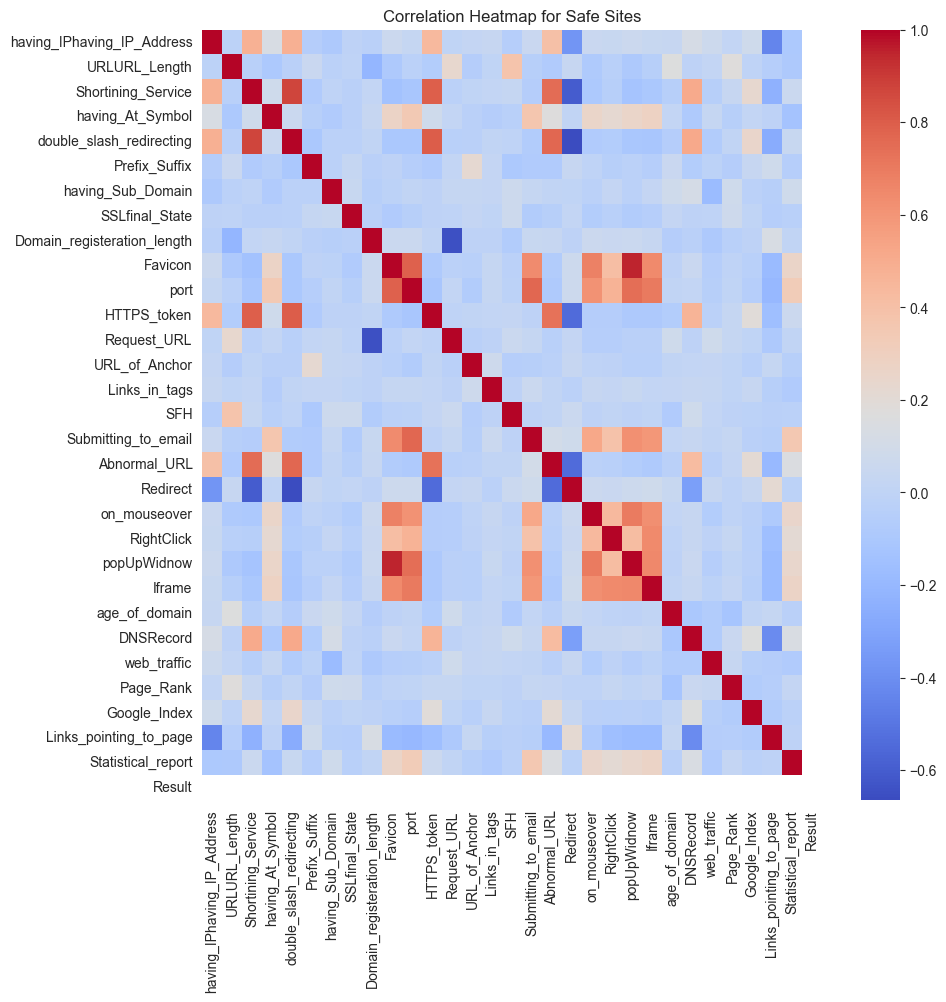

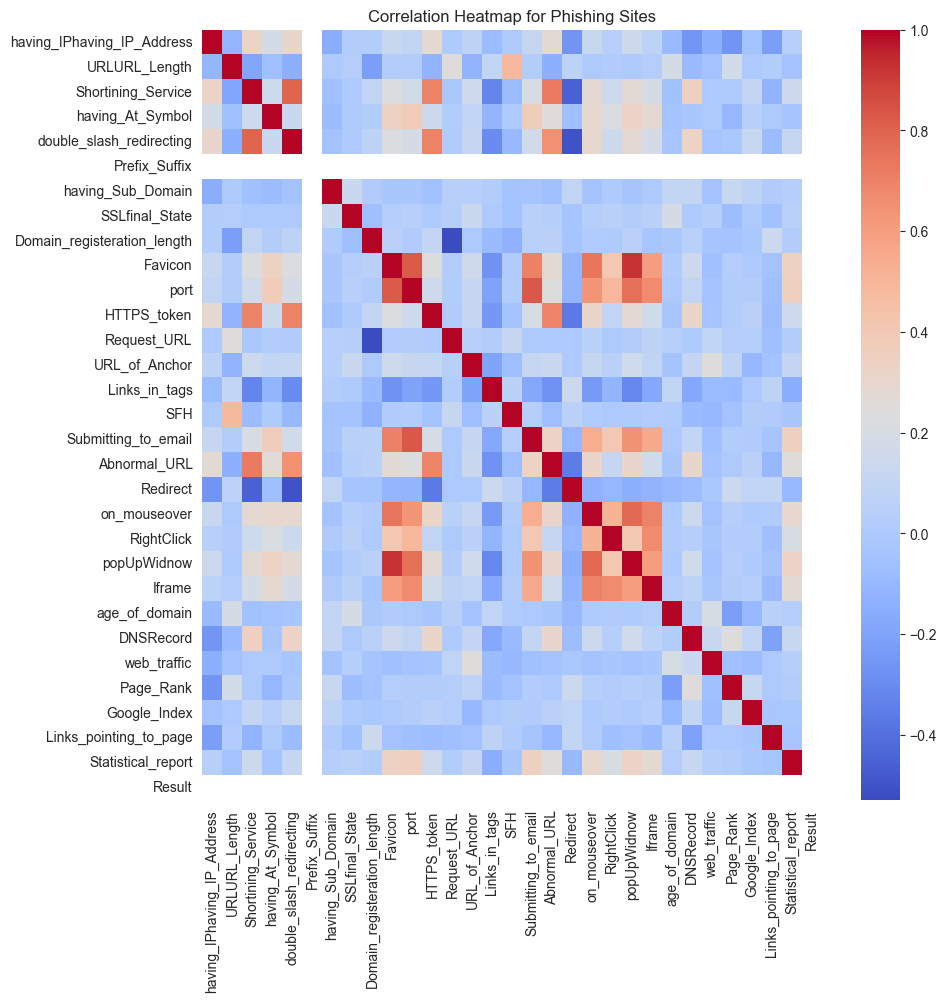

In [9]:
# plot heatmap for safe df
plt.figure(figsize=(10, 10))
sns.heatmap(safe_df.corr(), cmap='coolwarm')
plt.title('Correlation Heatmap for Safe Sites')
plt.savefig('./images/correlation_heatmap_safe.png')
plt.show()

# plot heatmap for phishing df
plt.figure(figsize=(10, 10))
sns.heatmap(phishing_df.corr(), cmap='coolwarm')
plt.title('Correlation Heatmap for Phishing Sites')
plt.savefig('./images/correlation_heatmap_phishing.png')
plt.show()

In [10]:
# Display the pairs of columns with higher than 0.5 correlation and lower than -0.5 correlation for each class
print('Higher than 0.5 correlation for Safe Sites:\n')
print(safe_df.corr()[safe_df.corr() > 0.5].unstack().drop_duplicates().sort_values(ascending=False))
print('\n\nLower than -0.5 correlation for Safe Sites:\n')
print(safe_df.corr()[safe_df.corr() < -0.5].unstack().drop_duplicates().sort_values(ascending=False))
print('\n\n\n\nHigher than 0.5 correlation for Phishing Sites:\n')
print(phishing_df.corr()[phishing_df.corr() > 0.5].unstack().drop_duplicates().sort_values(ascending=False))
print('\n\nLower than -0.5 correlation for Phishing Sites:\n')
print(phishing_df.corr()[phishing_df.corr() < -0.5].unstack().drop_duplicates().sort_values(ascending=False))

Higher than 0.5 correlation for Safe Sites:

having_IPhaving_IP_Address  having_IPhaving_IP_Address    1.000000
Favicon                     popUpWidnow                   0.950593
Shortining_Service          double_slash_redirecting      0.872403
double_slash_redirecting    HTTPS_token                   0.803623
Shortining_Service          HTTPS_token                   0.797206
Favicon                     port                          0.790246
port                        Submitting_to_email           0.770645
double_slash_redirecting    Abnormal_URL                  0.770486
Shortining_Service          Abnormal_URL                  0.746589
port                        popUpWidnow                   0.741383
HTTPS_token                 Abnormal_URL                  0.730055
port                        Iframe                        0.702711
on_mouseover                popUpWidnow                   0.694733
Favicon                     on_mouseover                  0.679511
popUpWidnow      

### 2. Determine the number of samples present in the data, unique elements in all the features.

### 3. Check if there is any null value in any features.

In [11]:
# Determine the number os samples in the dataset
print(f'Samples:\t{df.shape[0]}\n')

# Determine number of unique samples in the dataset
print(f'Unique Samples:\t{df.drop_duplicates().shape[0]}\n')

# Determine number of unique columns in the dataset
print(f'Unique Columns:\t{df.drop_duplicates().shape[1]}\n')

# Check for null values in any features
print(df.isnull().sum())

Samples:	11055

Unique Samples:	5849

Unique Columns:	31

having_IPhaving_IP_Address     0
URLURL_Length                  0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        0
port                           0
HTTPS_token                    0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
Redirect                       0
on_mouseover                   0
RightClick                     0
popUpWidnow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
web_traffic                    0
Page_Rank                      0
Google_Index                   0
Links_pointing_to_

## Correlation of Features and Feature Selection

In [12]:
# Remove features with greater than 0.7 correlation
correlation_df = df.drop(['Result'], axis=1).corr()

# identify columns with >= 0.7 correlation
correlated_columns = set()
for i in range(len(correlation_df.columns)):
    for j in range(i):
        if abs(correlation_df.iloc[i, j]) >= 0.7:
            colname = correlation_df.columns[i]
            correlated_columns.add(colname)

print(f'Columns with >= 0.7 correlation:\n\n{correlated_columns}\n')

Columns with >= 0.7 correlation:

{'port', 'popUpWidnow', 'on_mouseover', 'double_slash_redirecting', 'Abnormal_URL', 'HTTPS_token', 'Submitting_to_email'}



In [13]:
# Drop columns with >= 0.7 correlation
df.drop(correlated_columns, axis=1, inplace=True)

## Building Classification Model

### 1. Build classification models using a binary classifier to detect malicious or phishing URLs.

In [14]:
# Build a binary classification model to predict whether a website is safe or phishing
# import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, roc_curve, roc_auc_score
import pickle

In [15]:
# split data into features and target
X = df.drop('Result', axis=1)
y = df['Result']

# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# print train and test shapes
print(f'X Train Shape:\t{X_train.shape}')
print(f'X Test Shape:\t{X_test.shape}')
print(f'y Train Shape:\t{y_train.shape}')
print(f'y Test Shape:\t{y_test.shape}')

X Train Shape:	(8844, 23)
X Test Shape:	(2211, 23)
y Train Shape:	(8844,)
y Test Shape:	(2211,)


In [17]:
# scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# save the scaler to disk for future use
pickle.dump(scaler, open('./model_objects/scaler.pkl', 'wb'))

In [18]:
# build the model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [19]:
# save the model to disk for future use
pickle.dump(model, open('./model_objects/model.pkl', 'wb'))

In [20]:
# make predictions on the test set
y_pred = model.predict(X_test)

### 2. Illustrate the diagnostic ability of this binary classifier by plotting the ROC curve.

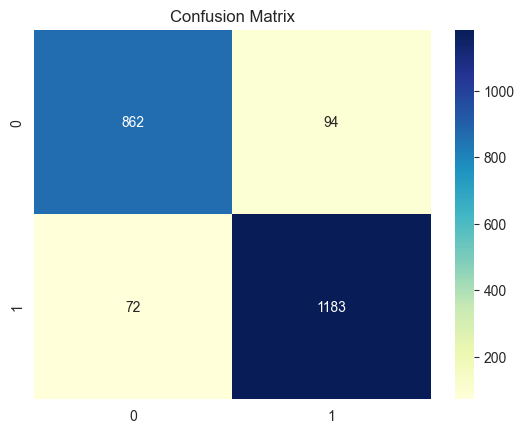

In [21]:
# plot the confusion matrix
plt.figure()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='YlGnBu')
plt.title('Confusion Matrix')
plt.savefig('./images/confusion_matrix.png')
plt.show()

In [22]:
# print the classification report
print('Classification Report:\n')
print(classification_report(y_test, y_pred))
print('\n')

Classification Report:

              precision    recall  f1-score   support

          -1       0.92      0.90      0.91       956
           1       0.93      0.94      0.93      1255

    accuracy                           0.92      2211
   macro avg       0.92      0.92      0.92      2211
weighted avg       0.92      0.92      0.92      2211





In [23]:
# print the accuracy score, precision score, and recall score
print('Accuracy Score:\n')
print(accuracy_score(y_test, y_pred))
print('\n')
print('Precision Score:\n')
print(precision_score(y_test, y_pred))
print('\n')
print('Recall Score:\n')
print(recall_score(y_test, y_pred))
print('\n')

Accuracy Score:

0.9249208502939846


Precision Score:

0.9263899765074393


Recall Score:

0.9426294820717132




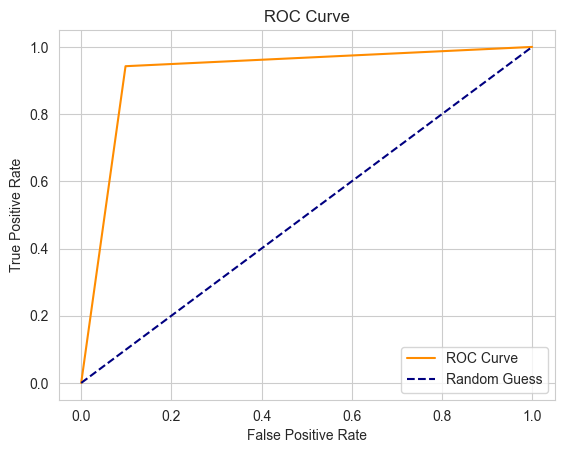

In [24]:
# plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC Curve')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.savefig('./images/roc_curve.png')
plt.show()


##### [Back to Top](#final-project---cyber-security-for-book-website)